In [1]:
] instantiate

In [2]:
using Arrow
using Conda
using DataFrames
using Plots
using PyCall

# Steps 1-3: loading data

In [3]:
sales_df = DataFrame(Arrow.Table("sales_norm.arrow"))
sales_mat = Matrix(sales_df)
kmeans_result = parse.(Int64, readlines("kmeans_assignments.txt"))
dbscan_result = parse.(Int64, readlines("dbscan_assignments.txt"));

# Steps 4-5, 9: adding and importing Python packages

In [4]:
Conda.add("scikit-learn")

┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\alexe\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\alexe\.julia\conda\3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py39haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.5.3~ --> pkgs/main::ca-certificates-2021.7.5-haa95532_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2021.5.30-py39hc~ --> pkgs/main::certifi-2021.5.30-py39haa95532_0
  conda              conda-forge::conda-4.10.3-py39hcbf530~ --> pkgs/main::conda-4.10.3-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1k-h8ffe710_1 -

In [5]:
Conda.add("umap-learn", channel="conda-forge")

┌ Info: Running `conda install -y -c conda-forge umap-learn` in root environment
└ @ Conda C:\Users\alexe\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\alexe\.julia\conda\3

  added / updated specs:
    - umap-learn


The following packages will be UPDATED:

  openssl              pkgs/main::openssl-1.1.1k-h2bbff1b_0 --> conda-forge::openssl-1.1.1k-h8ffe710_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.7.5-h~ --> conda-forge::ca-certificates-2021.5.30-h5b45459_0
  certifi            pkgs/main::certifi-2021.5.30-py39haa9~ --> conda-forge::certifi-2021.5.30-py39hcbf5309_0
  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.10.3-py39hcbf5309_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [6]:
pymanifold = pyimport("sklearn.manifold")

PyObject <module 'sklearn.manifold' from 'C:\\Users\\alexe\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\manifold\\__init__.py'>

In [7]:
pyumap = pyimport("umap")

PyObject <module 'umap' from 'C:\\Users\\alexe\\.julia\\conda\\3\\lib\\site-packages\\umap\\__init__.py'>

# Steps 6-8: t-SNE

In [8]:
tsne = pymanifold.TSNE(n_components=2).fit_transform(sales_mat')

811×2 Matrix{Float32}:
  15.7164    -16.4862
   6.94546   -25.5633
 -21.8545     -1.01791
   1.90976     9.59149
   2.70165    -6.17586
 -11.0002     -2.99797
  21.4283    -18.9886
  -5.46088   -16.0697
   6.25435    -3.66194
   3.89668   -12.843
 -13.9192     19.0212
 -26.8296     -0.321925
  16.736       4.2044
   ⋮         
 -12.4217     15.3383
  -9.3074     -0.928376
  -7.11768    28.5047
 -12.4321      8.3185
  -3.66332    24.7519
  -6.26476   -11.9036
  -0.983709   13.2975
  29.56      -12.7549
  -8.14442    16.3726
 -15.1219     16.9502
 -24.0943      3.04366
   2.11985    10.0964

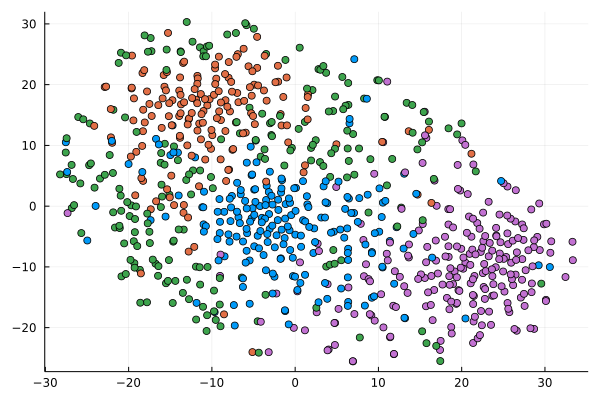

In [9]:
scatter(eachrow(tsne')..., color=kmeans_result, label=nothing)

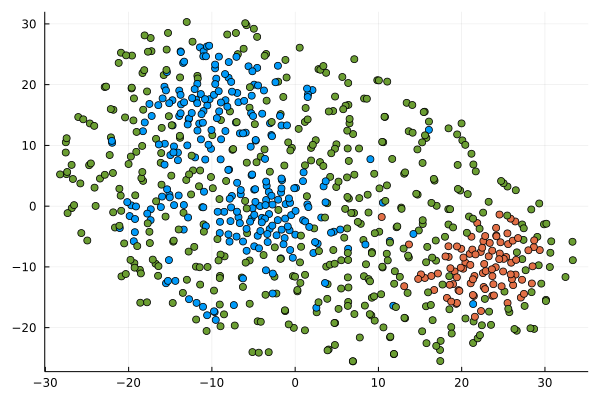

In [10]:
scatter(eachrow(tsne')..., color=dbscan_result, label=nothing)

# Steps 10-12: UMAP

In [11]:
umaps = [pyumap.UMAP(random_state=rnd, n_components=2).fit_transform(sales_mat') for rnd ∈ [3, 14, 15, 92]];

In [12]:
plot([scatter(eachrow(umaps[i]')..., color=kmeans_result, label=nothing) for i in 1:4]...)

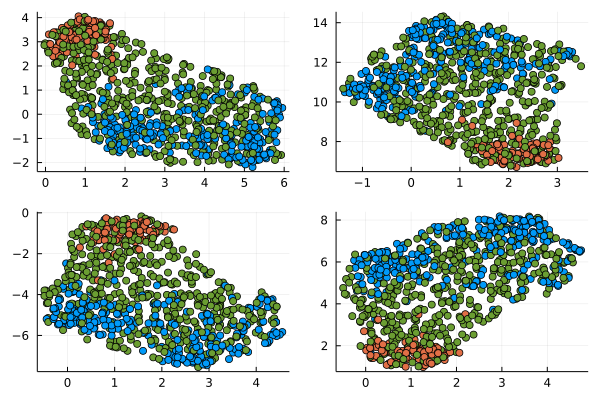

In [13]:
plot([scatter(eachrow(umaps[i]')..., color=dbscan_result, label=nothing) for i in 1:4]...)